# Classification Challenge

Wine experts can identify wines from specific vineyards through smell and taste, but the factors that give different wines their individual charateristics are actually based on their chemical composition.

In this challenge, you must train a classification model to analyze the chemical and visual features of wine samples and classify them based on their cultivar (grape variety).

> **Citation**: The data used in this exercise was originally collected by Forina, M. et al.
>
> PARVUS - An Extendible Package for Data Exploration, Classification and Correlation.
Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno,
16147 Genoa, Italy.
>
> It can be downloaded from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository]([http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science). 

## Explore the data

Run the following cell to load a CSV file of wine data, which consists of 12 numeric features and a classification label with the following classes:

- **0** (*variety A*)
- **1** (*variety B*)
- **2** (*variety C*)

In [96]:
import pandas as pd

# load the training dataset
data = pd.read_csv('data/wine.csv')
data.sample(10)

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
110,11.46,3.74,1.82,19.5,107,3.18,2.58,0.24,3.58,2.90,0.75,2.81,562,1
82,12.08,1.13,2.51,24.0,78,2.00,1.58,0.40,1.40,2.20,1.31,2.72,630,1
100,12.08,2.08,1.70,17.5,97,2.23,2.17,0.26,1.40,3.30,1.27,2.96,710,1
84,11.84,0.89,2.58,18.0,94,2.20,2.21,0.22,2.35,3.05,0.79,3.08,520,1
125,12.07,2.16,2.17,21.0,85,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378,1
53,13.77,1.90,2.68,17.1,115,3.00,2.79,0.39,1.68,6.30,1.13,2.93,1375,0
162,12.85,3.27,2.58,22.0,106,1.65,0.60,0.60,0.96,5.58,0.87,2.11,570,2
42,13.88,1.89,2.59,15.0,101,3.25,3.56,0.17,1.70,5.43,0.88,3.56,1095,0
172,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660,2
143,13.62,4.95,2.35,20.0,92,2.00,0.80,0.47,1.02,4.40,0.91,2.05,550,2


In [97]:
# Your code to evaluate data, and train and evaluate a classification model

In [98]:
data.columns[0: len(data.columns) -1 ]

Index(['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color_intensity',
       'Hue', 'OD280_315_of_diluted_wines', 'Proline'],
      dtype='object')

Alcohol


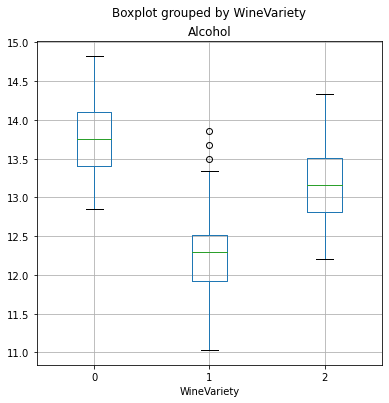

Malic_acid


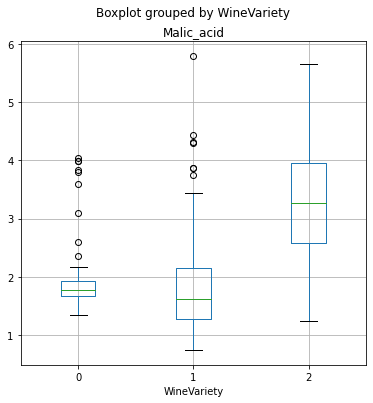

Ash


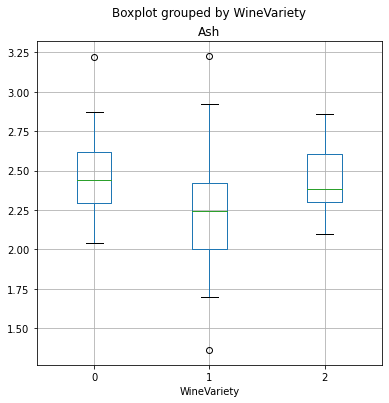

Alcalinity


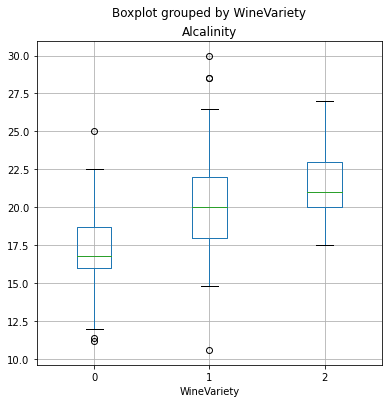

Magnesium


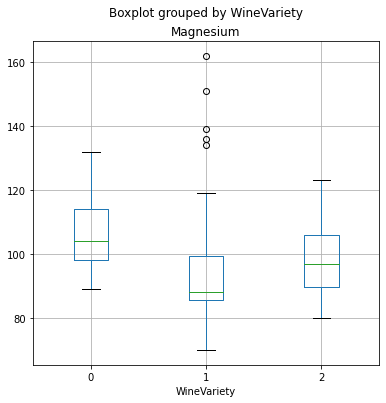

Phenols


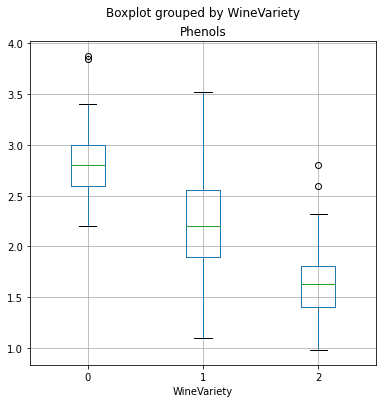

Flavanoids


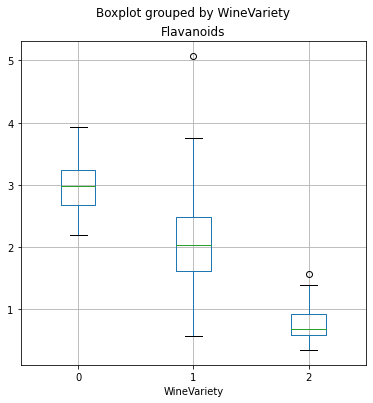

Nonflavanoids


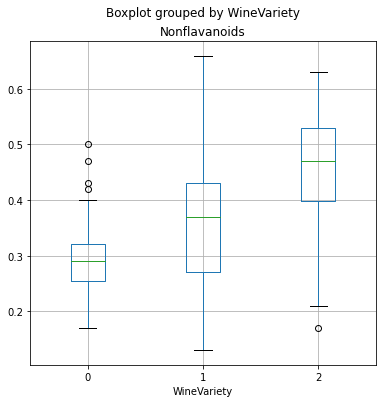

Proanthocyanins


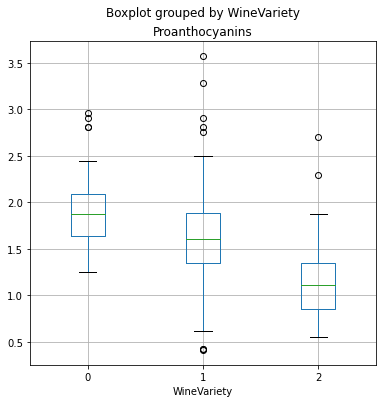

Color_intensity


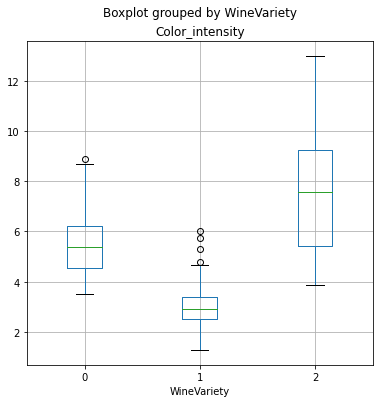

Hue


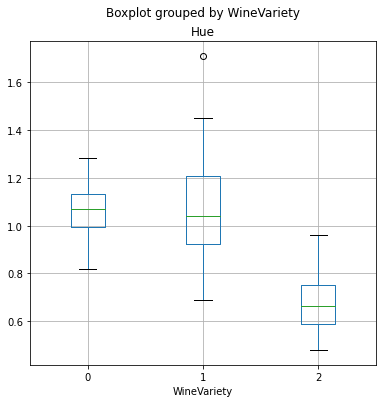

OD280_315_of_diluted_wines


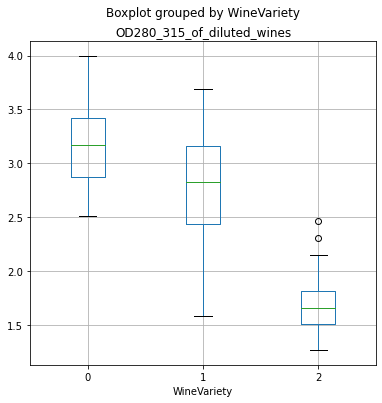

Proline


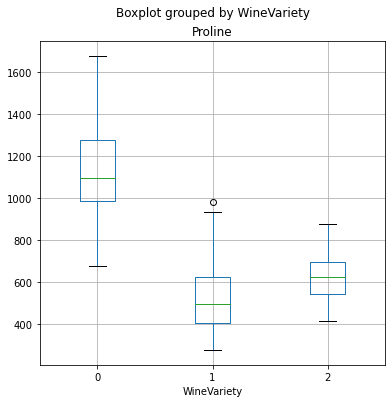

In [99]:
from matplotlib import pyplot as plt

def show_box_graph(col):
    data.boxplot(column=col, by="WineVariety", figsize=(6,6))
    plt.title(col)
    plt.show()


allFeatures = data.columns[0: len(data.columns) -1 ] 

for col in allFeatures:
    print(col);
    show_box_graph(col );

### Acc. to the box plot, there is a box plot. :)
We can take a bunch of features that will show promising result, grow old and make their mommies and daddies proud :')


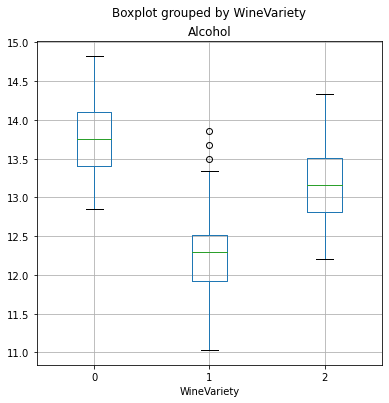

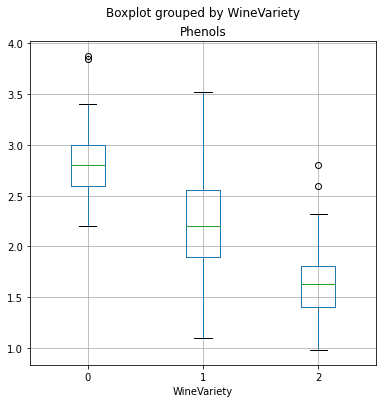

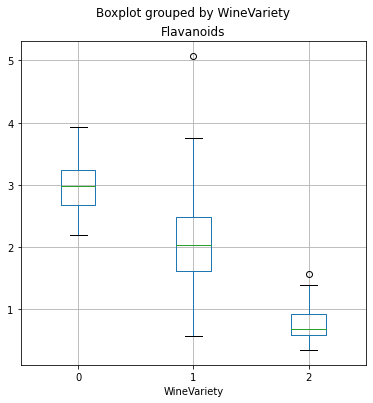

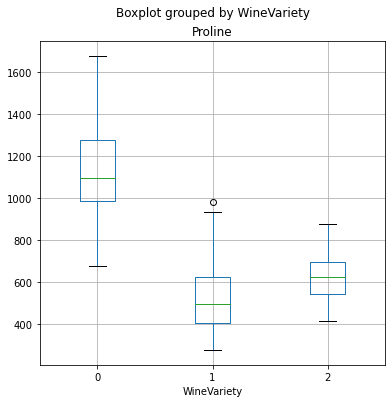

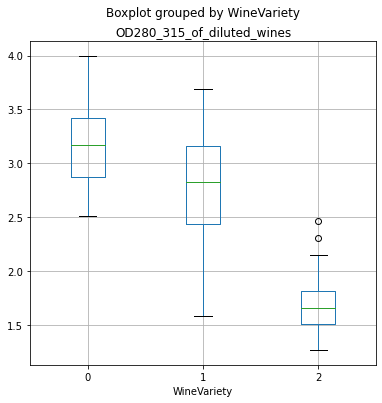

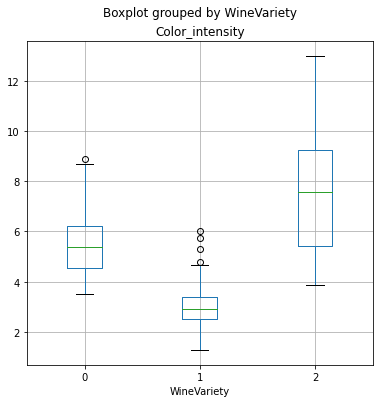

In [100]:
features = ["Alcohol", "Phenols", "Flavanoids", "Proline" , "OD280_315_of_diluted_wines", "Color_intensity" ]
for col in features:
    show_box_graph(col);

X , y = data[features].values , data["WineVariety"].values


In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size = 0.3 , random_state=0);

print("Train size: " , X_train.shape[0] , "Test size: ", X_test.shape[0])

Train size:  124 Test size:  54


In [102]:
# Train the model
from sklearn.linear_model import LogisticRegression
# help(LogisticRegression)
# Set regularization rate
reg = 0.01

# # train a logistic regression model on the training set
model = LogisticRegression(C=1/reg, solver="lbfgs",  multi_class='auto', max_iter=10000).fit(X_train, y_train)
print (model)

LogisticRegression(C=100.0, max_iter=10000)


In [103]:
predictions = model.predict(X_test);


In [104]:
from sklearn. metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       1.00      0.86      0.93        22
           2       0.93      1.00      0.96        13

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.95        54
weighted avg       0.95      0.94      0.94        54



In [105]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Overall Accuracy:",accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))

Overall Accuracy: 0.9444444444444444
Overall Precision: 0.9444444444444443
Overall Recall: 0.9545454545454546


In [106]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test,predictions)
print(matrix)



[[19  0  0]
 [ 2 19  1]
 [ 0  0 13]]


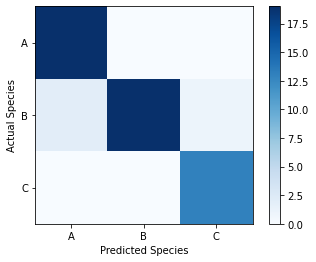

In [116]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# help(plt.xticks);

wine_classes = ["A", "B", "C"]

plt.imshow(matrix, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(wine_classes))
tick_marks;
plt.xticks(tick_marks, wine_classes)
plt.yticks(tick_marks, wine_classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

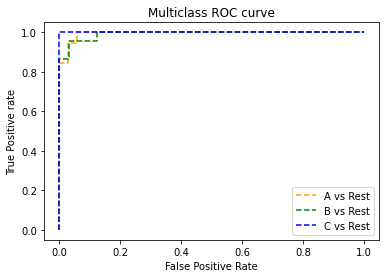

In [115]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Get class probability scores
wine_prob = model.predict_proba(X_test)

# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(wine_classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, wine_prob[:,i], pos_label=i)
    
# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=wine_classes[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=wine_classes[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=wine_classes[2] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [117]:
auc = roc_auc_score(y_test, wine_prob, multi_class='ovr')
print('Average AUC:', auc)

Average AUC: 0.9951540783777625


In [119]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Define preprocessing for numeric columns (scale them)
feature_columns = [0,1,2,3,4,5]
feature_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
    ])

# Create preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('preprocess', feature_transformer, feature_columns)])

# Create training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', SVC(probability=True))])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, y_train)
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', SVC(probability=True))])


In [130]:
# print(X_test)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        22
           2       0.93      1.00      0.96        13

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



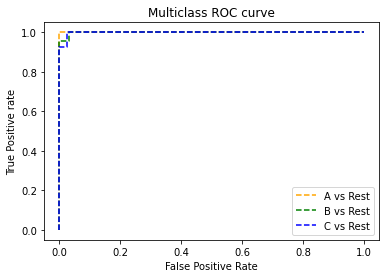

In [124]:
confusion_matrix(y_test , predictions)

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Get class probability scores
wine_prob = model.predict_proba(X_test)

# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(wine_classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, wine_prob[:,i], pos_label=i)
    
# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=wine_classes[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=wine_classes[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=wine_classes[2] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [125]:
auc = roc_auc_score(y_test, wine_prob, multi_class='ovr')
print('Average AUC:', auc)

Average AUC: 0.9989011242822219


In [144]:
import joblib

# Save the model as a pickle file
filename = '../models/wine_model.pkl'
joblib.dump(model, filename)

['../models/wine_model.pkl']

## Use the model with new data observation

When you're happy with your model's predictive performance, save it and then use it to predict classes for the following two new wine samples:

- \[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285\]
- \[12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520\]


In [157]:
features = ["Alcohol", "Phenols", "Flavanoids", "Proline" , "OD280_315_of_diluted_wines", "Color_intensity" ]
feature_indexes = []
columns = list(data.columns)
for feat in features:
    index = columns.index(feat);
    feature_indexes.append(index);
feature_indexes

[0, 5, 6, 12, 11, 9]

In [186]:
# help(joblib.dump)


model = joblib.load(filename);
# model
real_data = [[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285],
                  [12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]]

cleaned = [];

for (index,item) in  enumerate(real_data):
    cleaned.append([])
    for feature_index in feature_indexes:
        cleaned[index].append(item[feature_index])

    
cleaned   = np.array(cleaned)

real_predictions = model.predict(cleaned)
real_predictions

array([0, 1])